<a href="https://colab.research.google.com/github/eliyanto29/Fuzzy-Sentiment-Analisis/blob/master/Fuzzy_Sentiment_Analysis_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Fuzzy Sentiment Analysis with an CNN**
*Mathematics Department, Universitas Ahmad Dahlan, Indonesia*

https://math.uad.ac.id/

**Author**  : Sugiyarto, Ph.D dan Joko Eliyanto, S.Si

**Email**  : joko1400015006@webmail.uad.ac.id

###Abstraksi

Sentimen analisis adalah salah satu bagian dari natural language processing. Analisis sentimen dapat dilakukan dengan berbasis kamus, atau berbasis machine learning. Analisis sentimen berbasis machine learning memiliki kelebihan kedinamisan untuk bertemu dengan dataset bahasa baru atau kosa kata baru.  Analisis sentimen berusaha untuk memahami sentimen yang terkandung dalam suatu kalimat. Sebuah kalimat bisa memiliki sentimen positif, netral atau negatif. Meskipun demikian, faktanya setiap kalimat tidak selalu bersentimen positif, negatif, atau netral secara jelas. Kami berusaha mengembangkan metode sentimen analisis yang dapat menunjukkan derajat sentimen suatu kalimat. Sentimen analisis fuzzy convolutional neural network diperkenalkan dalam makalah ini untuk menghasilkan hasil analisis sentimen yang lebih akurat. Convolutional neural network adalah metode machine learning yang popular untuk sentimen analisis. Konsep himpunan fuzzy digunakan untuk menyatakan derajat sentimen sebuah kalimat. Analisis jarak euclidean untuk menentukan kedekatan dua buah vektor digunakan untuk menunjukkan bahwa metode ini lebih baik dari metode standar. Metode yang kami ajukan berhasil menghasilkan sebuah nilai yang menunjukkan derajat sentimen sebuah kalimat. Perbandingan jarak euclid antara hasil sentimen analisis standar dan metode kami menunjukkan bahwa hasil fuzzy convolutional neural network memiliki jarak yang relatif dekat dengan nilai sentimen sesungguhnya. Sentimen analisis fuzzy convolutional neural network terbukti dapat menghasilkan hasil sentimen analisis yang lebih halus daripada metode standar.

###Import Modul

In [1]:
from google.colab import drive
import numpy as np
import pandas as pd
import re
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, Embedding, Activation, Dropout
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D
import tensorflow as tf
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

Using TensorFlow backend.


###Dataset

Dataset IMDB berisi 50 ribu ulasan film untuk pemrosesan bahasa alami(NLP) atau analisis teks.
Ini adalah dataset untuk klasifikasi sentimen biner yang berisi lebih banyak data daripada dataset benchmark sebelumnya. Terdapat 25.000 ulasan film sangat polar untuk pelatihan dan 25.000 untuk pengujian. Jadi, prediksi jumlah ulasan positif dan negatif baik menggunakan klasifikasi atau algoritma pembelajaran yang mendalam.

###Data Cleaning

In [2]:
#Membuka akses ke google drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
#Mengakses dataset
imdb_data=pd.read_csv('/content/gdrive/My Drive/SA DATASET/IMDB Dataset.csv')
print(imdb_data.shape)
imdb_data.head(8)

(50000, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative


In [4]:
#Menampilkan statistik deskriptif
imdb_data.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,negative
freq,5,25000


In [5]:
#Menghitung jumlah sentimen
imdb_data['sentiment'].value_counts()

negative    25000
positive    25000
Name: sentiment, dtype: int64

In [6]:
#Menghapus strip(<br />) html
def remove_strip_html(text):
  return re.sub('<br />','',text)
imdb_data.review=imdb_data.review.apply(remove_strip_html)
imdb_data.head(8)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. The filming tec...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative


In [7]:
#Menghapus karakter-karakter yang tidak diinginkan
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    text=text.lower()
    return text
imdb_data['review']=imdb_data['review'].apply(remove_special_characters)
imdb_data.review.head(8)

0    one of the other reviewers has mentioned that ...
1    a wonderful little production the filming tech...
2    i thought this was a wonderful way to spend ti...
3    basically theres a family where a little boy j...
4    petter matteis love in the time of money is a ...
5    probably my alltime favorite movie a story of ...
6    i sure would like to see a resurrection of a u...
7    this show was an amazing fresh  innovative ide...
Name: review, dtype: object

In [8]:
#Menghitung jumlah teks review
teks=imdb_data['review'].tolist()
print(len(teks))

50000


### Data Preparation

In [9]:
#Mengkodekan sentimen negatif=0 dan positif=1
cleanup_nums = {"sentiment":     {"negative": 0, "positive": 1}}
imdb_data.replace(cleanup_nums, inplace=True)
imdb_data.sentiment.head(8)

0    1
1    1
2    1
3    0
4    1
5    1
6    1
7    0
Name: sentiment, dtype: int64

In [10]:
#Tokenisasi kata-kata
token=Tokenizer()
token.fit_on_texts(teks)
token.index_word

{1: 'the',
 2: 'and',
 3: 'a',
 4: 'of',
 5: 'to',
 6: 'is',
 7: 'in',
 8: 'it',
 9: 'i',
 10: 'this',
 11: 'that',
 12: 'was',
 13: 'as',
 14: 'with',
 15: 'for',
 16: 'movie',
 17: 'but',
 18: 'film',
 19: 'on',
 20: 'not',
 21: 'you',
 22: 'are',
 23: 'his',
 24: 'have',
 25: 'be',
 26: 'he',
 27: 'one',
 28: 'its',
 29: 'at',
 30: 'all',
 31: 'by',
 32: 'an',
 33: 'they',
 34: 'who',
 35: 'from',
 36: 'like',
 37: 'so',
 38: 'or',
 39: 'just',
 40: 'her',
 41: 'about',
 42: 'has',
 43: 'out',
 44: 'if',
 45: 'some',
 46: 'what',
 47: 'there',
 48: 'good',
 49: 'more',
 50: 'very',
 51: 'when',
 52: 'even',
 53: 'up',
 54: 'no',
 55: 'my',
 56: 'would',
 57: 'she',
 58: 'time',
 59: 'only',
 60: 'which',
 61: 'really',
 62: 'their',
 63: 'see',
 64: 'were',
 65: 'story',
 66: 'had',
 67: 'can',
 68: 'me',
 69: 'than',
 70: 'much',
 71: 'we',
 72: 'well',
 73: 'been',
 74: 'get',
 75: 'will',
 76: 'into',
 77: 'other',
 78: 'great',
 79: 'do',
 80: 'bad',
 81: 'because',
 82: 'also',

In [11]:
#Jumlah kosa kata
vocab=len(token.index_word)+1
vocab

222598

In [12]:
#Mengkonvers kalimat dengan kode-kode kata(encode)
encode_text=token.texts_to_sequences(teks)
print(encode_text)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [13]:
#Standarisasi kalimat dalam bentuk matriks
top_words=vocab
input_length=500
X=pad_sequences(encode_text, maxlen=input_length,padding='post')
X

array([[  27,    4,    1, ...,    0,    0,    0],
       [   3,  382,  113, ...,    0,    0,    0],
       [   9,  191,   10, ...,    0,    0,    0],
       ...,
       [   9,  225,    3, ...,    0,    0,    0],
       [ 143,  160,    5, ...,    0,    0,    0],
       [  54,   27, 5722, ...,    0,    0,    0]], dtype=int32)

In [14]:
#Mengubah sentimen menjadi data kategori [ 0  1 ]
sentimen=imdb_data.sentiment
sentimen=to_categorical(sentimen)
print(sentimen)

[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [15]:
#Memecah dataset menjadi data latih dan data uji
#test_size: perbandingan data uji(0.2) dan data latih(0.8)
X_train, X_test, y_train, Y_test=train_test_split(X,sentimen, test_size=0.2, stratify=sentimen)

### Mendefinisikan Model CNN

In [16]:
#Mendefinisikan model CNN
model=Sequential()                                                                      #Model sekuensial
model.add(Embedding(top_words, 32, input_length=input_length))                          #Embedding (Layer Input)
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))         #Layer Konvolusi
model.add(MaxPooling1D(pool_size=2))                                                    #Layer MaxPooling
model.add(Flatten())                                                                    #Flatten
model.add(Dense(250, activation='relu'))                                                #Layer perseptron
model.add(Dense(2, activation='sigmoid'))                                               #Layer Output

#Meng-compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 32)           7123136   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 500, 32)           3104      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 250, 32)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8000)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 250)               2000250   
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 502       
Total params: 9,126,992
Trainable params: 9,126,992
Non-trainable params: 0
____________________________________________

In [17]:
#Melatih model
history = model.fit(X_train, y_train, 
          validation_data=(X_test, Y_test), 
          epochs=5, 
          batch_size=128, 
          verbose=1)
  
#Evaluasi Model
scores=model.evaluate(X_test, Y_test, verbose=1)

print("Accuracy: %.2f%%" % (scores[1]*100))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 40000 samples, validate on 10000 samples
Epoch 1/5
40000/40000 [==============================] - 11s 267us/step - loss: 0.4077 - accuracy: 0.7878 - val_loss: 0.2522 - val_accuracy: 0.9000
Epoch 2/5
40000/40000 [==============================] - 3s 87us/step - loss: 0.1432 - accuracy: 0.9474 - val_loss: 0.2979 - val_accuracy: 0.8846
Epoch 3/5
40000/40000 [==============================] - 4s 88us/step - loss: 0.0488 - accuracy: 0.9845 - val_loss: 0.3549 - val_accuracy: 0.8870
Epoch 4/5
40000/40000 [==============================] - 3s 87us/step - loss: 0.0134 - accuracy: 0.9965 - val_loss: 0.5137 - val_accuracy: 0.8824
Epoch 5/5
10000/10000 [==============================] - 1s 51us/step
Accuracy: 88.43%


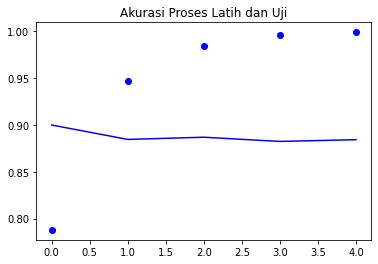

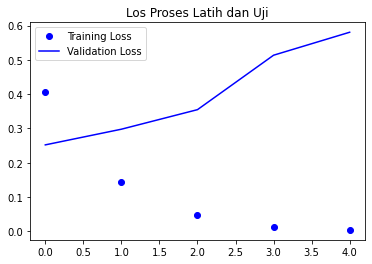

In [18]:
#Plot Akurasi dan Loss
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Akurasi Proses Latih dan Uji')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Los Proses Latih dan Uji')
plt.legend()

plt.show()

### Sentimen Fuzzy

In [20]:
#Fungsi sentimen fuzzy
def single_fuzzy_sentiment_biner(txt):
  x=[txt]
  x=token.texts_to_sequences(x)
  x=pad_sequences(x, maxlen=input_length, padding='post')
  predictions=model.predict(x)
  probability=predictions[0].tolist()
  fuzzy_sentiment=0.5-((1/2)*probability[0])+((1/2)*probability[1])
  return fuzzy_sentiment

In [21]:
#Menjalankan fungsi sentimen fuzzy
print(teks[3])
print('Sentimen Fuzzy:')
single_fuzzy_sentiment_biner(teks[3])

basically theres a family where a little boy jake thinks theres a zombie in his closet  his parents are fighting all the timethis movie is slower than a soap opera and suddenly jake decides to become rambo and kill the zombieok first of all when youre going to make a film you must decide if its a thriller or a drama as a drama the movie is watchable parents are divorcing  arguing like in real life and then we have jake with his closet which totally ruins all the film i expected to see a boogeyman similar movie and instead i watched a drama with some meaningless thriller spots3 out of 10 just for the well playing parents  descent dialogs as for the shots with jake just ignore them
Sentimen Fuzzy:


0.0009047050552908331

In [23]:
#Fungsi uji sentimen kalimat(positif atau negatif)[STANDAR]
def sentimen_analysis(x):
  x=[x]
  x=token.texts_to_sequences(x)
  x=pad_sequences(x, maxlen=input_length, padding='post')
  return model.predict_classes(x)

In [25]:
#Menjalankan fungsi sentimen fuzzy dan standar
x=teks[3]
print(x)
print('Sentimen')
print(imdb_data.sentiment[3])
print('Sentimen analisis dengan CNN')
print(sentimen_analysis(x))
print('Fuzzy sentimen analisis dengan CNN')
single_fuzzy_sentiment_biner(x)

basically theres a family where a little boy jake thinks theres a zombie in his closet  his parents are fighting all the timethis movie is slower than a soap opera and suddenly jake decides to become rambo and kill the zombieok first of all when youre going to make a film you must decide if its a thriller or a drama as a drama the movie is watchable parents are divorcing  arguing like in real life and then we have jake with his closet which totally ruins all the film i expected to see a boogeyman similar movie and instead i watched a drama with some meaningless thriller spots3 out of 10 just for the well playing parents  descent dialogs as for the shots with jake just ignore them
Sentimen
0
Sentimen analisis dengan CNN
[0]
Fuzzy sentimen analisis dengan CNN


0.0009047050552908331

### Evaluasi Sentimen Fuzzy

In [26]:
#Mendefinisikan fungsi fuzzy sentimen pada satu kolom(banyak kalimat)
def fuzzy_sentimen_column(bahan):
  fuzzy_sentimen_kolom=[]
  for kalimat in bahan:
    fuzzy_sentimen_kolom.append(single_fuzzy_sentiment_biner(kalimat))
  return fuzzy_sentimen_kolom

In [27]:
#Mendefinisikan fungsi uji sentimen pada satu kolom(banyak kalimat)
def sentimen_column(bahan):
  x=token.texts_to_sequences(bahan)
  x=pad_sequences(x, maxlen=input_length, padding='post')
  word_sentimen=model.predict_classes(x)
  word_sentimen=gabung_sublist(word_sentimen)
  return word_sentimen

In [30]:
#Fungsi menggabung sublist
def gabung_sublist(list1):
  list2=[]
  for i in list1:
    list2.append(float(i))
  return list2

In [31]:
#Mendefinisikan pengurangan dua list
def substract_two_list(list1,list2):
  difference = []
  zip_object = zip(list1, list2)
  for list1_i, list2_i in zip_object:
    difference.append(list1_i-list2_i)
  return difference

In [32]:
#Menghitung jarak euclid vektor sentimen(asli) dan prediksi CNN dan prediksi fuzzy sentimen
bahan=teks
hasil1=fuzzy_sentimen_column(bahan)
squared_hasil1 = [number ** 2 for number in hasil1]
print(squared_hasil1)
hasil2=sentimen_column(bahan)
squared_hasil2 = [number ** 2 for number in hasil2]
print(squared_hasil2)
sentimencoba=imdb_data.sentiment[:100]
squared_sentimencoba = [number ** 2 for number in sentimencoba]
print(squared_sentimencoba)
print(abs(sum(substract_two_list(squared_hasil1,squared_sentimencoba))))
print(abs(sum(substract_two_list(squared_hasil2,squared_sentimencoba))))

[0.9999913024997056, 0.9999999917456694, 0.9999025535601642, 8.184912370687894e-07, 0.9998297887108568, 0.9999884274478181, 0.9989048974565203, 9.271191101652731e-15, 1.7623870060226762e-25, 0.9899419713031075, 3.4940832953838134e-05, 2.5111553978735734e-10, 8.895560192913659e-15, 3.48390811628086e-06, 0.9979205224516683, 6.860082851958045e-18, 0.9965278739545544, 5.435310025669723e-25, 0.9846272754284779, 6.405302328175948e-09, 0.9999891055859962, 4.504475525827713e-21, 0.9998111925013722, 1.2343594286002648e-17, 2.9905431402080355e-13, 0.9425715822566716, 0.9999995645387448, 4.413158065796778e-14, 0.00043724326879084844, 0.9999999813218211, 0.9999995262622, 0.9999999961638975, 2.367641376059486e-10, 0.9999999927803405, 1.2910346565070753e-16, 6.896511743351304e-14, 1.686257933376369e-06, 1.0693747617175405e-16, 0.999946937550679, 2.346410485456103e-16, 1.1665757269653057e-07, 0.9999997638730702, 1.4398262175452816e-06, 1.1833510881337938e-10, 0.9997883857854445, 0.9998410850587851, 4

### Kesimpulan

Fuzzy Sentimen Analisis menyajikan sentimen sebuah kalimat dalam bentuk fuzzy atau derajat sentimen sebuah kalimat(tidak pasti[0 1])

**Akhir dokumen**

---



